# <font color="Turquoise"><b>Práctica 3: Número de clusters</b></font>

Elaborado con el apoyo de:
Luis Fernando Becerra, BEDA Aprendizaje de Máquinas 2024-1S - 2025-1S
Andres Esteban Marin Manco, BEDA Aprendizaje de Máquinas 2025-1S


# <font color="LightPink"><b>Clustering - Parte II</b></font>

En esta segunda parte vamos a explorar algunos mecanismos para **definir el número de clusters**, un paso crucial en tareas de agrupamiento.

En aplicaciones reales, pocas veces se dispone de esta información de manera explícita. Por ello, es fundamental conocer herramientas que nos permitan **estimar una cantidad adecuada de grupos** a partir de los datos mismos.





Primero usaremos el dataset de juguete tanto para 3 como para 10 clusters que creamos en la primera parte.



In [1]:
#Importar librerias
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [2]:
#Generamos 500 muestras para cada dataset
n_samples = 500
seed = 30
#Nubes de puntos gaussianos (3 clusters)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
#Nubes de puntos gaussianos (10 clusters)
blobs10 = datasets.make_blobs(n_samples=n_samples, centers=10, random_state=seed)

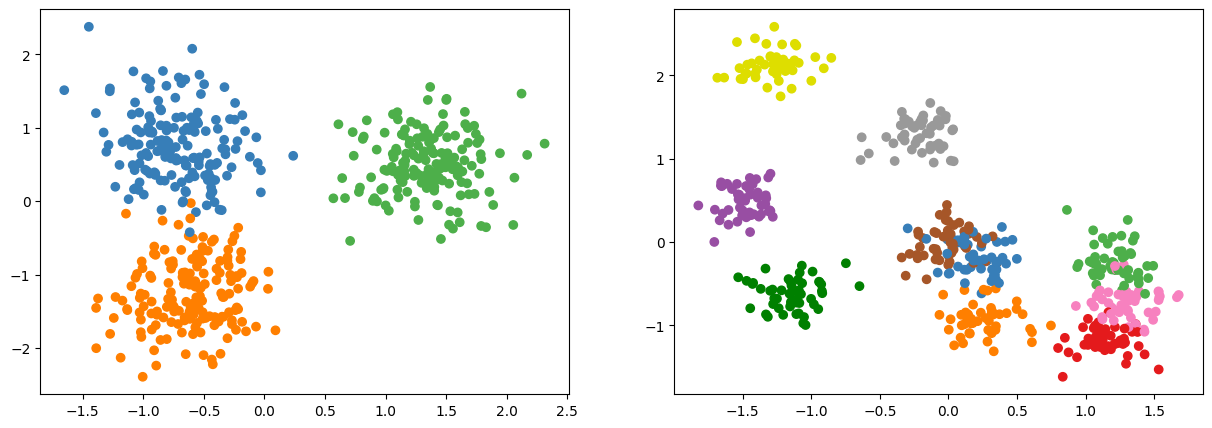

In [3]:
#Grafica de los datasets
scaler = StandardScaler()
colors = np.array(["#377eb8",
                   "#ff7f00",
                   "#4daf4a",
                   "#f781bf",
                   "#a65628",
                   "#984ea3",
                   "#999999",
                   "#e41a1c",
                   "#dede00",
                   "#008000",
                   "#0343DF",
                   "#7FFF00",
                   "#ED0DD9",
                   "#FBDD7E",
                   "#FFA500"])
plt.figure(figsize=(15, 5))

data_sets = [(blobs),(blobs10)]
i=1
for dataset in data_sets:
  X = scaler.fit_transform(dataset[0])
  y = dataset[1]
  plt.subplot(1,len(data_sets),i)
  plt.scatter(X[:, 0], X[:, 1],color=colors[y])
  i+=1

## <font color="LightPink"><b>K-Means</b></font>

En el caso del algoritmo `K-Means`, una estrategia común para estimar el número adecuado de clusters consiste en analizar la **suma de distancias de cada punto a su centroide más cercano**.




### **Método del codo**

<p align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/10/image-24.png" width="350"/>
</p>

<br>

La métrica **inercia intra-cluster** tiende a disminuir a medida que se incrementa el número de clusters. Sin embargo, a partir de cierto punto, la reducción de la inercia se vuelve marginal. Este comportamiento da lugar al conocido **método del codo**, que ayuda a identificar un valor apropiado para `k`.






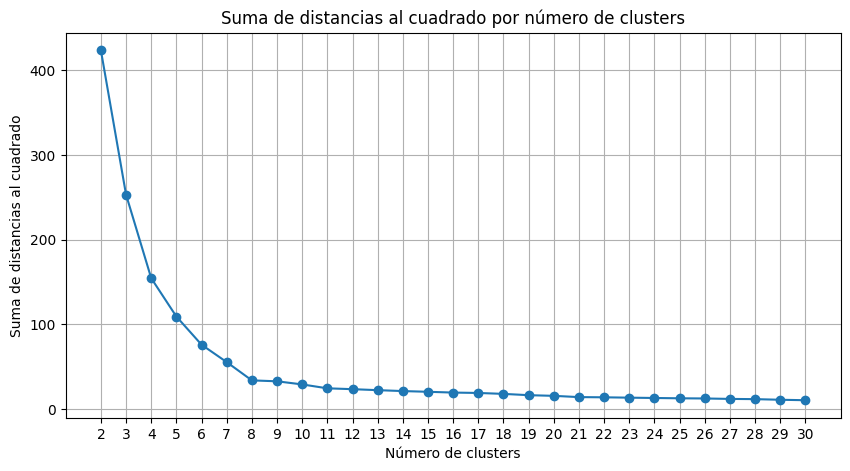

In [8]:
#Importar Kmeans
from sklearn.cluster import KMeans
#Organizamos los datos
#X = scaler.fit_transform(blobs[0])
X = scaler.fit_transform(blobs10[0])
y = blobs[1]
# arreglo para la suma de distancias
inertias = []
n_inicial = 2
n_final = 30
for k in range(n_inicial, n_final + 1):
    #Configuramos KMeans
    kmeans = KMeans(n_clusters=k, random_state=seed)
    #Entrenamos el modelo
    kmeans.fit(X)
    #Extraemos las etiquetas
    y_pred_kmeans = kmeans.labels_
    #Guardamos la suma de distancias
    inertias.append(kmeans.inertia_)

#Graficamos el resultado
plt.figure(figsize=(10, 5))
plt.plot(range(n_inicial, n_final + 1), inertias, marker='o')
plt.title('Suma de distancias al cuadrado por número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de distancias al cuadrado')
plt.xticks(range(n_inicial, n_final + 1))
plt.grid()
plt.show()

Usualmente, se toma el **final del codo** como el valor estimado del número de clusters, aunque esta elección puede tener **diferentes interpretaciones** según el contexto y la naturaleza de los datos.


### **Índice Davies-Bouldin y Silueta**

A continuación, estudiaremos qué sucede al analizar algunos **índices de validación**, los cuales permiten evaluar la calidad del agrupamiento sin requerir etiquetas verdaderas:

- **Davies-Bouldin**: propuesto en *1979*, se basa en la **similitud promedio de un cluster con su cluster más similar**. Valores **más bajos** indican un mejor agrupamiento.

- **Silueta**: mide la **similitud de un punto con su propio cluster (cohesión)** en comparación con otros clusters (separación). El índice oscila entre `-1` y `+1`, donde un valor **alto** sugiere que los objetos están bien cohesionados dentro de su cluster y bien separados de los demás.



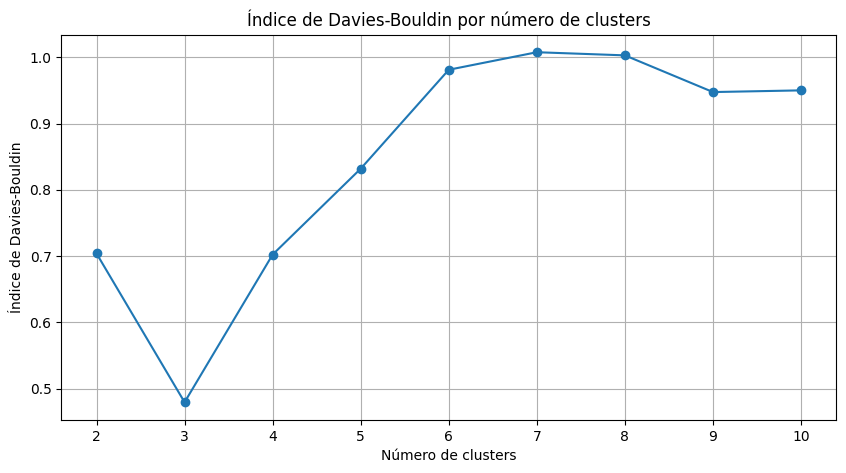

In [9]:
#
# Importamos el índice
from sklearn.metrics import davies_bouldin_score

# Creamos un arreglo para almacenar los posibles valores
db = []
X = scaler.fit_transform(blobs[0]) # 3 clusters

# Vamos a hacer un cíclo k desde 2 hasta 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, init='random', max_iter=200,)
    kmeans.fit(X)
    db.append(davies_bouldin_score(X, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), db, marker='o')
plt.title('Índice de Davies-Bouldin por número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Índice de Davies-Bouldin')
plt.xticks(range(2, 11))
plt.grid()
plt.show()


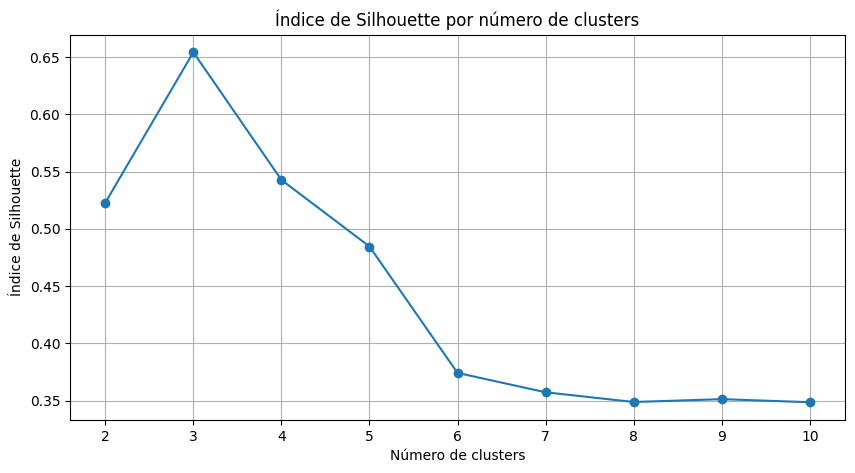

In [10]:
#
# Importamos el índice
from sklearn.metrics import silhouette_score

X = scaler.fit_transform(blobs[0])
sil = []
# Vamos a hacer un ciclo k desde 2 hasta 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, init='random', max_iter=200,)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.labels_)) 
#Creamos un arreglo para almacenar los posibles valores

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil, marker='o')
plt.title('Índice de Silhouette por número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Índice de Silhouette')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

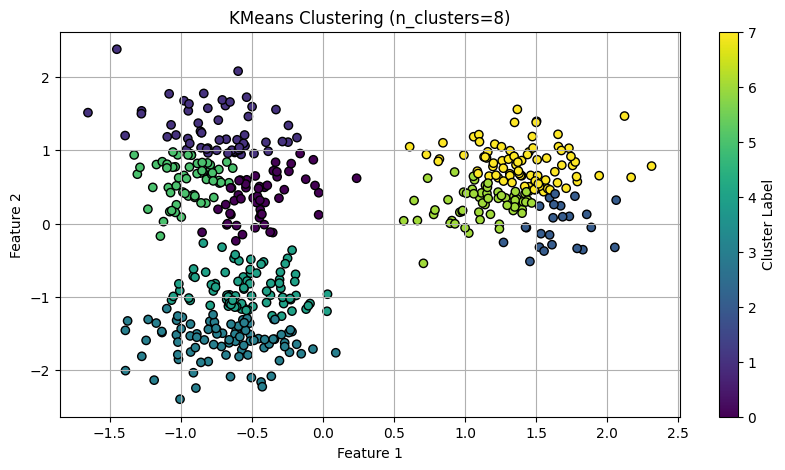

In [11]:
n_cluster_selected = 8
#Ingresamos número de clusters 'n_clusters'
#Definimos cuantas veces se repite el proceso n_init = 10 por defecto
kmeans = KMeans(
    n_clusters=n_cluster_selected,  # Número de clusters
    n_init=10,  # Número de inicializaciones
    init='random',  # Método de inicialización
    max_iter=200,  # Número máximo de iteraciones
)
#Entrenamos el modelo
kmeans.fit(X)
#Obtenemos las etiquetas de pertenencia
y_pred_kmeans = kmeans.labels_
#Graficamos el resultado
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.title(f'KMeans Clustering (n_clusters={n_cluster_selected})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()      